# Chapter 2: Exercise 2.3

Consider the two-point BVP 
$$
\large -u'' = f, \ x\in (a,b), \ u(a)=0=u(b).
$$
Find the Green's function $G=G(x,y)$ such that the solution to the BVP can be written compactly as
$$
\large u(x) = \int_a^b G(x,y)f(y)\, dy.
$$
Use this representation to compute solutions to the BVP when

(a) $f(x) = 1$

(b) $f(x) = x$

(c) $f(x) = x^2$

## So what is a Green's functions exactly?

The Wiki article https://en.wikipedia.org/wiki/Green's_function contains some useful information, but perhaps the most useful part of the article comes in the motivation where it states (edits and emphasis are my own):

> Thus, one may obtain the function u(x) through knowledge of the Green's function ... and the [data]. This process relies upon the linearity of the [differential] operator ...

> In other words, the solution ..., u(x), can be determined by ... integration ... Although f (x) is known, this integration cannot be performed unless G is also known. The problem now lies in finding the Green's function G ... For this reason, the Green's function is also sometimes called the ***fundamental solution*** ...

> ***Not every [differential] operator*** ... ***admits a Green's function***. A Green's function can also be thought of as a ***right inverse of [the differential operator]***. Aside from the difficulties of finding a Green's function for a particular operator, the integral [for computing u(x)] may be quite difficult to evaluate. However the method gives a theoretically exact result.

The integral used to compute $u(x)=\int_a^b G(x,y)f(y)\, dy$ in fact reveals something else about the Green's function $G(x,y)$. 
Specifically, the value of the solution $u$ at the point $x$ is determined by a type of ***weighted sum*** of the data $f$ over the interval $[a,b]$.
In a sense, $G(x,y)$ is indicating how the value of the data $f$ at the point $y$ is influencing the solution $u$ at the point $x$. 

This can be described in more plain terms using a specific application for which this particular BVP above is a model.
Consider an elastic bar of length $b-a$ and uniform stiffness $1$ that is positioned horizontally with both ends clamped so that they cannot move to an external force applied to the bar.
Application of a force in the vertical direction causes a bending of the bar with vertical displacement modeled by the above BVP.
Suppose the force $f$ is given by
$$
\large d_{y,\Delta x}(x) = \left\{\begin{array}{rr}
                                    \frac{x-y+\Delta x}{(\Delta x)^2}, & -\Delta x + y < x < y, \\
                                    -\frac{x-y-\Delta x}{(\Delta x)^2}, & y \leq x < y+\Delta x, \\
                                    0, & \text{else}.
                                  \end{array}
                           \right.
$$
We show some plots of $d_{y,\Delta x}(x)$ below for $a=0$, $b=1$, $\Delta x = 0.1$ and $y=0.2, 0.5,$ and $0.7$.

In [1]:
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt

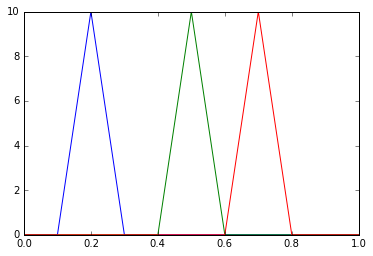

In [2]:
def d_y(x,y,delta_x):
    if (-delta_x + y) < x < y:
        z = (x-y+delta_x)/(delta_x**2)
    elif (y <= x < y + delta_x):
        z = -(x-y-delta_x)/(delta_x**2)
    else:
        z = 0
    return z

delta_x = 0.1
y = [0.2,0.5,0.7]
num_pts = 50
x_mesh = np.linspace(0,1,num_pts+1)
f = np.zeros(num_pts+1)
for y in y:
    for i in range(0,num_pts+1):
        f[i] = d_y(x_mesh[i],y,delta_x)
    plt.plot(x_mesh,f)

Using equations for the area of a triangle, we clearly see that $\int_a^b d_{y,\Delta x}(x) \, dx = 1$ (assuming we did not choose $y$ too close to the boundary of $[a,b]$ which might truncate the support of this function).

Now, with such a forcing function (based on choosing an appropriate $y$ and $\Delta x$), we have that
$$
    \begin{eqnarray}
        u(x) &=& \int_a^b G(x,y) d_{y,\Delta x}(x)\, dy \\
             &=& \int_{y-\Delta x}^{y+\Delta x} G(x,y) d_{y,\Delta x}(x) \, dy.
    \end{eqnarray}
$$
Assuming that $G$ is also continuous, the integral mean value theorem implies there exists some $c\in(y-\Delta x, y+\Delta x)$ such that 
$$
    u(x) = G(x,c)d_{y,\Delta x}(c)(2\Delta x).
$$
Since $\int_a^b d_{y,\Delta x}(x)\, dx = 1$, we expect that for sufficiently small $\Delta x$ that $d_{y,\Delta x}(c)(2\Delta x)\approx 1$ (again by the integral mean value theorem). 
Moreover, for small $\Delta x$, $c\approx y$.
Thus, for sufficiently small $\Delta x$, we expect that
$$
    u(x) \approx G(x,y).
$$
In other words, the Green's function describes how the bar bends at point $x$ due to a very localized unit force applied to the bar at point $y$. 

This suggests taking the limit as $\Delta x\downarrow 0$ of $d_{y,\Delta x}(x)$ and defining the limit function as $\delta_y(x)$, or simply as $\delta(x-y)$, which by pointwise limits appears to have the properties that
$$
    \delta(x-y)=0, \ \text{ if } x\neq y \Rightarrow \delta(x) = 0, \ \text{ if } x\neq 0,
$$
and
$$
    \delta(x-y) = \infty, \ \text{ if } x= y \Rightarrow \delta(x) = \infty, \ \text{ if } x\neq 0,
$$
and by the above integral approximations should also possess the properties that
$$
    \int_a^b \delta(x-y)\, dx = \left\{\begin{array}{rr}
                                        1, & \text{if } y\in[a,b],\\
                                        0, & \text{if } y\notin[a,b],
                                        \end{array}
                                 \right.
$$
and, for continuous functions $g$ on $[a,b]$, 
$$
    \int_a^b g(x)\delta(x-y)\, dx = \left\{\begin{array}{rr}
                                        g(y), & \text{if } y\in[a,b],\\
                                        0, & \text{if } y\notin[a,b].
                                        \end{array}
                                 \right.
$$
Of course, no such function can have these properties. 
Nonetheless, we refer to this $\delta$ as the Dirac delta function (see https://en.wikipedia.org/wiki/Dirac_delta_function), which is a type of *generalized* function where all the formal properties above are made quite rigorous using the theory of ***distributions*** (see https://en.wikipedia.org/wiki/Distribution_(mathematics)).
However, this topic is beyond the scope of this course (it is best studied in a more advanced PDEs or special topics course after taking functional analysis).
Therefore, we will simply use this Dirac delta function and all of its properties to derive formal solutions, Green's functions, etc. with the comforting knowledge that everything is somehow justified (similar to how we will use Fourier series later in the course).

## Determining the Green's function.

We solve 
$$
\large -u'' = \delta(x-y), \ x\in(a,b), \ u(a)=0=u(b)
$$
where $y\in(a,b)$ and $\delta$ denotes the Dirac delta function. 
This solution determines the Green's function $G(x,y)$.

When $x\neq y$, $\delta(x-y)=0$, and the fundamental set of solutions to the ODE is given by
$$
 \large   \{1, x\}. 
$$

Let $u^-(x)$ denote the part of the solution for $x<y$ and $u^+(x)$ denote the part of the solution for $x>y$. 

Then, we have that
$$
 \large u^-(x) = c_1 + c_2x,
$$
and
$$
\large u^+(x) = c_3 + c_4x,
$$
where $c_1,c_2,c_3, $ and $c_4$ are constants. 

We use the following four conditions to setup a linear system of equations to determine the constants:

(1) $u^-(a) = 0$

(2) $u^+(b) = 0$

(3) $u^-(y) = u^+(y)$

(4) $(u^+)'(y) - (u^-)'(y) = -1$

These conditions yield the following system of equations

$$
    \left\{
        \begin{array}{rrrrrrrrrr}
            c_1 &+& ac_2 & &  & &   &=& 0, \\
            c_1 &+& yc_2 &-& c_3 &-& yc_4 &=& 0,\\
                & & c_2  & &     &-& c_4  &=& 1, \\
                & &      & & c_3 &+& bc_4 &=& 0,
        \end{array}
    \right.
$$
which we solve below using the ``SymPy`` library (see http://docs.sympy.org/latest/index.html for more info).

In [3]:
import sympy as sp #Similar to symbolic toolbox in Matlab

a, b, x, y = sp.symbols('a, b, x, y')
c1, c2, c3, c4 = sp.symbols('c1, c2, c3, c4')

A = sp.Matrix(([1, a, 0, 0],[1, y, -1, -y],[0,1,0,-1],[0,0,1,b]))

data = sp.Matrix([0,0,1,0])

c = sp.linsolve((A, data), c1,c2,c3,c4)
print c

{(a*(b - y)/(a - b), (-b + y)/(a - b), b*(a - y)/(a - b), (-a + y)/(a - b))}


In [4]:
print sp.simplify(a*(b - y)/(a - b) +  (-b + y)/(a - b)*x)

print sp.simplify(b*(a - y)/(a - b) + (-a + y)/(a - b)* x)

(a - x)*(b - y)/(a - b)
(a - y)*(b - x)/(a - b)


### The Green's function

From the above computation, we see that
$$
    \large G(x,y) = \left\{ \begin{array}{rr}
                                \frac{1}{a-b}(a-x)(b-y), & x<y, \\
                                \frac{1}{a-b}(a-y)(b-x), & y\leq x.
                            \end{array}
                    \right.
$$

We define this using the ``Piecewise`` function available in ``SymPy``. 

In [33]:
G = sp.Piecewise(((a - x)*(b - y)/(a - b), x<y),
                 ((a - y)*(b - x)/(a - b), y<=x))

We ``lambdify`` this function so that we can easily evaluate it and make plots to check that everything is working for a more familiar case when $a=0$ and $b=1$.

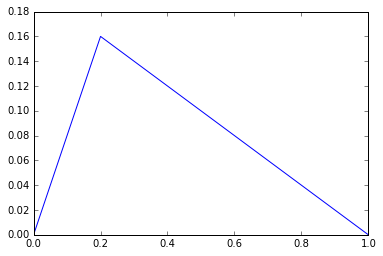

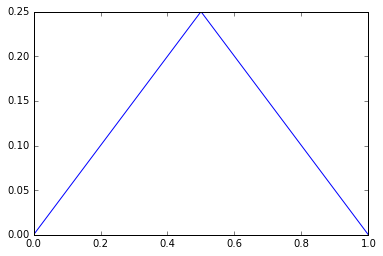

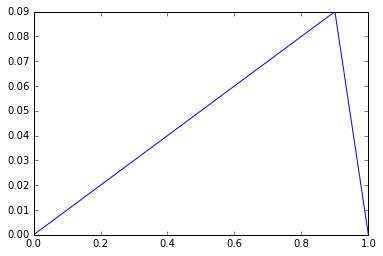

In [34]:
from sympy.utilities.lambdify import lambdify

G_eval = lambdify((a,b,x,y), G)
x_mesh = np.linspace(0,1,21)

y_pt1 = 0.2
y_pt2 = 0.5
y_pt3 = 0.9

plt.figure(1)
plt.plot(x_mesh,G_eval(0,1,x_mesh,y_pt1))
plt.figure(2)
plt.plot(x_mesh,G_eval(0,1,x_mesh,y_pt2))
plt.figure(3)
plt.plot(x_mesh,G_eval(0,1,x_mesh,y_pt3))

#### Part (a):

$f(x) = 1$ implies that
$$
u(x)=\int_a^b G(x,y)\, dy = \int_a^x G(x,y)\, dy + \int_x^b G(x,y)\, dy.
$$

In [7]:
u1_form = sp.integrate(G, y)
print sp.simplify(u1_form.subs(y,b))
print sp.simplify(u1_form.subs(y,x))
print sp.simplify(u1_form.subs(y,a))

Piecewise((b**2*(a - x)/(2*(a - b)), x < b), (b*(2*a - b)*(b - x)/(2*(a - b)), b <= x))
Piecewise((x*(a - x)*(2*b - x)/(2*(a - b)), x < x), (x*(2*a - x)*(b - x)/(2*(a - b)), x <= x))
Piecewise((a*(-a + 2*b)*(a - x)/(2*(a - b)), x < a), (a**2*(b - x)/(2*(a - b)), a <= x))


In [8]:
upper = b**2*(a - x)/(2*(a - b)) - x*(a - x)*(2*b - x)/(2*(a - b))
lower = x*(2*a - x)*(b - x)/(2*(a - b)) - a**2*(b - x)/(2*(a - b)) 
u1 = sp.factor(upper + lower)
print "Solution to part (a): u(x) = ", u1
u1_fcn = lambdify((a,b), u1)
print "Check with a=0, b=1: u(x) = ", u1_fcn(0,1)

Solution to part (a): u(x) =  -(-a + x)*(-b + x)/2
Check with a=0, b=1: u(x) =  -x*(x - 1)/2


#### Part (b):

$f(x)=x$ implies that
$$
    u(x) = \int_a^x G(x,y)y\, dy + \int_x^b G(x,y)y\, dy.
$$

In [9]:
u2_form = sp.integrate(G*y, y)
print sp.simplify(u2_form.subs(y,b))
print sp.simplify(u2_form.subs(y,x))
print sp.simplify(u2_form.subs(y,a))

Piecewise((b**3*(a - x)/(6*(a - b)), x < b), (b**2*(3*a - 2*b)*(b - x)/(6*(a - b)), b <= x))
Piecewise((x**2*(a - x)*(3*b - 2*x)/(6*(a - b)), x < x), (x**2*(3*a - 2*x)*(b - x)/(6*(a - b)), x <= x))
Piecewise((a**2*(-2*a + 3*b)*(a - x)/(6*(a - b)), x < a), (a**3*(b - x)/(6*(a - b)), a <= x))


In [10]:
upper = b**3*(a - x)/(6*(a - b)) - x**2*(a - x)*(3*b - 2*x)/(6*(a - b))
lower = x**2*(3*a - 2*x)*(b - x)/(6*(a - b)) - a**3*(b - x)/(6*(a - b)) 
u2 = sp.factor(upper+lower)
print "Solution to part (b): u(x) = ", u2
u2_fcn = lambdify((a,b), u2)
print "Check with a=0, b=1: u(x) = ", u2_fcn(0,1).simplify()

Solution to part (b): u(x) =  -(-a + x)*(-b + x)*(a + b + x)/6
Check with a=0, b=1: u(x) =  x*(-x**2 + 1)/6


#### Part (c): Skipped.

Green's function for $-u''+u = f(x)$?

In [48]:
x, y = sp.symbols('x, y')
c1, c2, c3, c4 = sp.symbols('c1, c2, c3, c4')

A = sp.Matrix(([1, 1, 0, 0],[sp.exp(-y), sp.exp(y), -sp.exp(-y), -sp.exp(y)],\
               [sp.exp(-y), -sp.exp(y), -sp.exp(-y), sp.exp(y)],[0,0,sp.exp(-1),sp.exp(1)]))

data = sp.Matrix([0,0,-1,0])

c = sp.linsolve((A, data), c1,c2,c3,c4)
print c

{((exp(2*y) - exp(2))*exp(y)/(-exp(4*y) + 2*exp(3*y)*sinh(y) - exp(2*y) + 2*exp(y + 2)*sinh(y) + exp(2*y + 2) + exp(2)), -(exp(2*y) - exp(2))*exp(y)/(-exp(4*y) + 2*exp(3*y)*sinh(y) - exp(2*y) + 2*exp(y + 2)*sinh(y) + exp(2*y + 2) + exp(2)), 2*exp(2*y + 2)*sinh(y)/(-exp(4*y) + 2*exp(3*y)*sinh(y) - exp(2*y) + 2*exp(y + 2)*sinh(y) + exp(2*y + 2) + exp(2)), 2*exp(2*y)*sinh(y)/((exp(2*y) - 2*exp(y)*sinh(y) + 1)*exp(2*y) - (exp(2*y) + 2*exp(y)*sinh(y) + 1)*exp(2)))}


In [55]:
def c_1(y):
    z = (np.exp(2*y) - np.exp(2))*np.exp(y)/(-np.exp(4*y) + 2*np.exp(3*y)*np.sinh(y) - \
                                          np.exp(2*y) + 2*np.exp(y + 2)*np.sinh(y) + \
                                          np.exp(2*y + 2) + np.exp(2))
    return z

def c_2(y):
    z = -(np.exp(2*y) - np.exp(2))*np.exp(y)/(-np.exp(4*y) + 2*np.exp(3*y)*np.sinh(y) - \
                                           np.exp(2*y) + 2*np.exp(y + 2)*np.sinh(y) + \
                                           np.exp(2*y + 2) + np.exp(2))
    return z

def c_3(y):
    z = 2*np.exp(2*y + 2)*np.sinh(y)/(-np.exp(4*y) + 2*np.exp(3*y)*np.sinh(y) - np.exp(2*y) + \
                                   2*np.exp(y + 2)*np.sinh(y) + np.exp(2*y + 2) + np.exp(2))
    return z

def c_4(y):
    z = 2*np.exp(2*y)*np.sinh(y)/((np.exp(2*y) - 2*np.exp(y)*np.sinh(y) + 1)*np.exp(2*y) - \
                               (np.exp(2*y) + 2*np.exp(y)*np.sinh(y) + 1)*np.exp(2))
    return z

G = sp.Piecewise((c1*sp.exp(-x)+c2*sp.exp(x), x<y),
                 (c3*sp.exp(-x)+c4*sp.exp(x), y<=x))

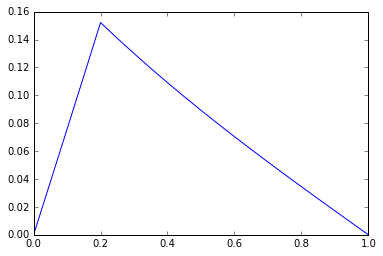

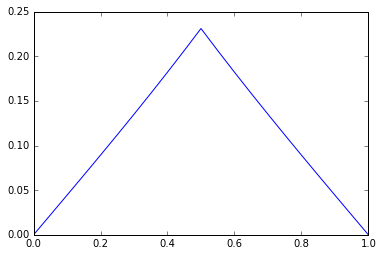

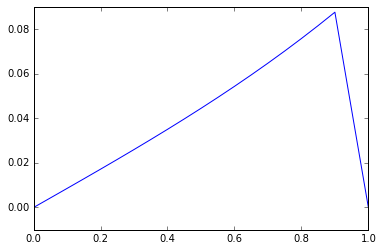

In [59]:
G_eval = lambdify((c1,c2,c3,c4,x,y), G)
x_mesh = np.linspace(0,1,21)

y_pt1 = 0.2
y_pt2 = 0.5
y_pt3 = 0.9

G_plot = 0*x_mesh

plt.figure(1)
for i in xrange(0,21):
    G_plot[i] = G_eval(c_1(y_pt1),c_2(y_pt1),c_3(y_pt1),c_4(y_pt1),x_mesh[i],y_pt1)   
plt.plot(x_mesh,G_plot)

plt.figure(2)
for i in xrange(0,21):
    G_plot[i] = G_eval(c_1(y_pt2),c_2(y_pt2),c_3(y_pt2),c_4(y_pt2),x_mesh[i],y_pt2)   
plt.plot(x_mesh,G_plot)

plt.figure(3)
for i in xrange(0,21):
    G_plot[i] = G_eval(c_1(y_pt3),c_2(y_pt3),c_3(y_pt3),c_4(y_pt3),x_mesh[i],y_pt3)   
plt.plot(x_mesh,G_plot)

In [60]:
G = sp.Piecewise((1/sp.sin(1) * sp.sin(x) * sp.sin(1-y), x<y),
                 (1/sp.sin(1) * sp.sin(y) * sp.sin(1-x), y<=x))

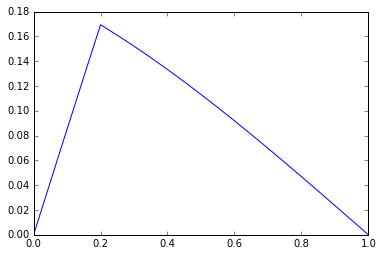

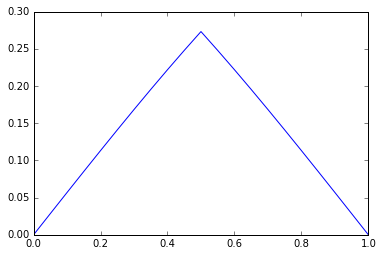

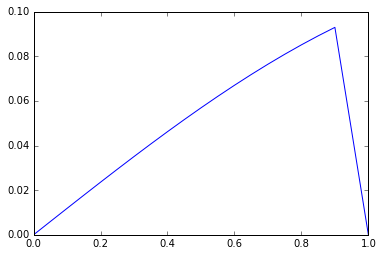

In [62]:
G_eval = lambdify((x,y), G)
x_mesh = np.linspace(0,1,21)

y_pt1 = 0.2
y_pt2 = 0.5
y_pt3 = 0.9


G_plot = 0*x_mesh

plt.figure(1)
for i in xrange(0,21):
    G_plot[i] = G_eval(x_mesh[i],y_pt1)   
plt.plot(x_mesh,G_plot)

plt.figure(2)
for i in xrange(0,21):
    G_plot[i] = G_eval(x_mesh[i],y_pt2)   
plt.plot(x_mesh,G_plot)

plt.figure(3)
for i in xrange(0,21):
    G_plot[i] = G_eval(x_mesh[i],y_pt3)   
plt.plot(x_mesh,G_plot)